## Importing necessary libraries

In [1]:
import numpy as np
import gzip
import struct
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import feature #pip install scikit-image
from skimage import exposure
from tqdm import tqdm
import pickle
from PIL import Image
import os, sys
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

##### Reading train data

      filename  Classes  Labels
0  1025794.jpg  707-320       0
1  1340192.jpg  707-320       0
2  0056978.jpg  707-320       0
3  0698580.jpg  707-320       0
4  0450014.jpg  707-320       0


,filename,Classes,Labels,im_paths
0,1025794.jpg,707-320,0,../../Datasets/Case_Study_02/images/1025794.jpg
1,1340192.jpg,707-320,0,../../Datasets/Case_Study_02/images/1340192.jpg
2,0056978.jpg,707-320,0,../../Datasets/Case_Study_02/images/0056978.jpg
3,0698580.jpg,707-320,0,../../Datasets/Case_Study_02/images/0698580.jpg
4,0450014.jpg,707-320,0,../../Datasets/Case_Study_02/images/0450014.jpg


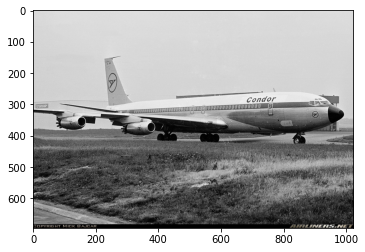

In [2]:
train = pd.read_csv("../../Datasets/Case_Study_02/train.csv")
print(train.iloc[:5])

#adding complete path to the filenames
train["im_paths"] = ["../../Datasets/Case_Study_02/images/"+i for i in train['filename']]

#reading sample image and displaying it to ensure correct reading of data
plt.imshow(cv2.imread(train.im_paths[0]))
train.head()

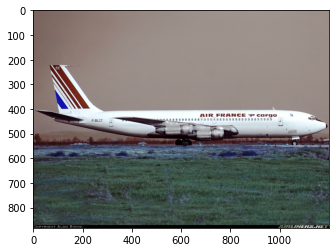

In [3]:
test = pd.read_csv("../../Datasets/Case_Study_02/test.csv")
# print(test.iloc[:5])

#adding complete path to the filenames
test["im_paths"] = ["../../Datasets/Case_Study_02/images/"+i for i in test['filename']]

#reading sample image and displaying it to ensure correct reading of data
plt.imshow(cv2.imread(test.im_paths[0]))
# test.head()

## Reading all the images for test and train set separately

In [4]:
train['images'] = ""
for i, img in tqdm(enumerate(train.im_paths)):
    temp = cv2.imread(img)
    temp = cv2.resize(temp, (50,50))
    train['images'].iloc[i] = temp
    
train.head()

3334it [01:32, 35.96it/s]


,filename,Classes,Labels,im_paths,images
0,1025794.jpg,707-320,0,../../Datasets/Case_Study_02/images/1025794.jpg,"[[[217, 217, 217], [219, 219, 219], [219, 219,..."
1,1340192.jpg,707-320,0,../../Datasets/Case_Study_02/images/1340192.jpg,"[[[220, 220, 220], [214, 214, 214], [197, 197,..."
2,0056978.jpg,707-320,0,../../Datasets/Case_Study_02/images/0056978.jpg,"[[[207, 167, 138], [203, 168, 135], [206, 171,..."
3,0698580.jpg,707-320,0,../../Datasets/Case_Study_02/images/0698580.jpg,"[[[69, 64, 49], [69, 60, 46], [69, 62, 47], [6..."
4,0450014.jpg,707-320,0,../../Datasets/Case_Study_02/images/0450014.jpg,"[[[229, 162, 112], [235, 165, 116], [234, 163,..."


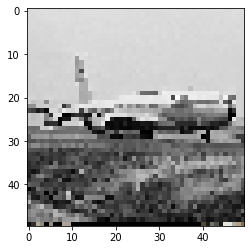

In [5]:
img = train['images'].iloc[0]
plt.imshow(img)

In [6]:
test['images'] = ""
for i, img in tqdm(enumerate(test.im_paths)):
    temp = cv2.imread(img)
    temp = cv2.resize(temp, (50,50))
    test['images'].iloc[i] = temp
    
test.head()

3333it [02:12, 25.23it/s]


,filename,Classes,Labels,im_paths,images
0,1514522.jpg,707-320,0,../../Datasets/Case_Study_02/images/1514522.jpg,"[[[125, 101, 95], [123, 101, 95], [126, 104, 9..."
1,0747566.jpg,707-320,0,../../Datasets/Case_Study_02/images/0747566.jpg,"[[[223, 218, 170], [229, 225, 176], [236, 233,..."
2,1008575.jpg,707-320,0,../../Datasets/Case_Study_02/images/1008575.jpg,"[[[148, 151, 152], [147, 150, 154], [146, 151,..."
3,0717480.jpg,707-320,0,../../Datasets/Case_Study_02/images/0717480.jpg,"[[[250, 250, 250], [242, 242, 242], [247, 247,..."
4,0991569.jpg,707-320,0,../../Datasets/Case_Study_02/images/0991569.jpg,"[[[209, 209, 209], [208, 208, 208], [214, 214,..."


##### Displaying sample images from both sets

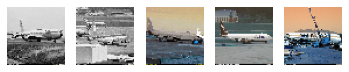

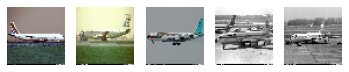

In [7]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(train.images[i])
    plt.axis('off')
plt.show()

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(test.images[i])
    plt.axis('off')
plt.show()

## Calculating Histogram of Oriented Gradients (HOG) for all the images

In [8]:
def compute_HOG(image):
  (H1, hogImage1) = feature.hog(image, orientations = 3,
                                pixels_per_cell  = (2, 2), cells_per_block  = (2, 2), transform_sqrt=True,
                                block_norm  = 'L1' , visualize=True)
  return (H1, hogImage1)

In [9]:
train['HOG'] = ''
for i, img in tqdm(enumerate(train.images)):
  # pre-process image here if needed
  # Computing the HOG features. Also Keep and eye on the parameters used in this function call.
  (h_vector, h_image) = compute_HOG(img)
  #append computed HOGs in train data
  train['HOG'].iloc[i] = h_vector

3334it [04:50, 11.46it/s]


In [10]:
train.head()

,filename,Classes,Labels,im_paths,images,HOG
0,1025794.jpg,707-320,0,../../Datasets/Case_Study_02/images/1025794.jpg,"[[[217, 217, 217], [219, 219, 219], [219, 219,...","[0.05570014036242716, 0.0, 0.0947004801122713,..."
1,1340192.jpg,707-320,0,../../Datasets/Case_Study_02/images/1340192.jpg,"[[[220, 220, 220], [214, 214, 214], [197, 197,...","[0.015567689158320023, 0.22083001746002082, 0...."
2,0056978.jpg,707-320,0,../../Datasets/Case_Study_02/images/0056978.jpg,"[[[207, 167, 138], [203, 168, 135], [206, 171,...","[0.04052668545681894, 0.046605688275341776, 0...."
3,0698580.jpg,707-320,0,../../Datasets/Case_Study_02/images/0698580.jpg,"[[[69, 64, 49], [69, 60, 46], [69, 62, 47], [6...","[0.01474461324155283, 0.005273800419451831, 0...."
4,0450014.jpg,707-320,0,../../Datasets/Case_Study_02/images/0450014.jpg,"[[[229, 162, 112], [235, 165, 116], [234, 163,...","[0.05976053671269339, 0.17363601722452704, 0.0..."


In [11]:
test['HOG'] = ''
for i, img in tqdm(enumerate(test.images)):
  # pre-process image here if needed
  # Computing the HOG features. Also Keep and eye on the parameters used in this function call.
  (h_vector, h_image) = compute_HOG(img)
  #append computed HOGs in train data
  test['HOG'].iloc[i] = h_vector

3333it [03:25, 16.25it/s]


In [12]:
train.to_csv("train_data.csv")

In [13]:
test.to_csv("test_data.csv")

In [14]:
test.head()

,filename,Classes,Labels,im_paths,images,HOG
0,1514522.jpg,707-320,0,../../Datasets/Case_Study_02/images/1514522.jpg,"[[[125, 101, 95], [123, 101, 95], [126, 104, 9...","[0.10850712136164176, 0.01807516911754517, 0.0..."
1,0747566.jpg,707-320,0,../../Datasets/Case_Study_02/images/0747566.jpg,"[[[223, 218, 170], [229, 225, 176], [236, 233,...","[0.1591321537419068, 0.027202693367652887, 0.0..."
2,1008575.jpg,707-320,0,../../Datasets/Case_Study_02/images/1008575.jpg,"[[[148, 151, 152], [147, 150, 154], [146, 151,...","[0.139560843515568, 0.07590890683826824, 0.0, ..."
3,0717480.jpg,707-320,0,../../Datasets/Case_Study_02/images/0717480.jpg,"[[[250, 250, 250], [242, 242, 242], [247, 247,...","[0.026531792721992166, 0.04839519288223626, 0...."
4,0991569.jpg,707-320,0,../../Datasets/Case_Study_02/images/0991569.jpg,"[[[209, 209, 209], [208, 208, 208], [214, 214,...","[0.0879801015066657, 0.019995477615151296, 0.0..."


##### Extracting values and labels from training and test data

In [15]:
train_dat = list(train.HOG)
train_lab = list(train.Labels)
test_dat = list(test.HOG)
test_lab = list(test.Labels)

# Machine Learning Models

## Naive Bayes

## Random Forest

In [16]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#                                  max_depth=1, random_state=0).fit(train_dat, train_lab)

clf = GradientBoostingClassifier(max_depth=1, random_state=0).fit(train_dat, train_lab)

In [ ]:
#checking the values in training labels
train_lab

In [ ]:
#unique values in train labels
set(train_lab)

In [ ]:
predicted_labels = clf.predict(test_dat)
print("Prediction completed")
# uncomment below lines to get the predicted labesl and the actural labels printed.
print("Comparing predicted and actual labels")
print(predicted_labels[0:10])
test_lab[:10]

In [ ]:
#calculating accuracy of predictions made by random forest classifier

mask = predicted_labels==test_lab
correct = np.count_nonzero(mask)
print (correct*100.0/predicted_labels.size)

print("Number of mislabeled points out of a total %d points : %d"% (test_dat.shape[0], (test_lab != predicted_labels).sum()))

In [ ]:
print(classification_report(test_lab, predicted_labels, target_names=target_labels))

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_lab, predicted_labels)
conf_mat

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(clf, test_dat, test_lab, cmap='plasma',display_labels=target_labels, ax = ax) 
plt.show()